![](https://project-iris.app-staging.cloud/wp-content/uploads/2019/08/imageedit_10_9511370427-clean2.png)

**Image Source:** https://www.start.umd.edu/gtd/

#**Introduction**

Information on more than 180,000 Terrorist Attacks

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

**Definition of terrorism:**

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

**About dataset:**

Size: (181691, 135)

Geography: Worldwide

Time period: 1970-2017, except 1993

Unit of analysis: Attack

Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes.

Access this link to know detail of columns: https://start.umd.edu/gtd/downloads/Codebook.pdf

**☆ HIGHLIGHTS**:

1. Overview of the whole world
2. Know terrorist trends and regional differences
3. Be able to answer the big question posed in the end

**☆ CHALLENGE**:

1. Understand the meaning of the columns.
2. Find the right chart to show the change of trends across each region.
3. Thinking about big question for analysis
4. Find an approach to analyze and answer the big question.
5. Some difficulties in coding, drawing maps.

#**Import Libraries And Set Up**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%%time 
# Install Geopandas
!pip install geopandas
# Install Folium for Geographic data visualization
!pip install folium


     |████████████████████████████████| 1.0 MB 14.7 MB/s 
     |████████████████████████████████| 6.3 MB 68.7 MB/s 
     |████████████████████████████████| 15.4 MB 53.3 MB/s 
CPU times: user 100 ms, sys: 28.2 ms, total: 128 ms
Wall time: 8.89 s


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import geopandas as gpd
import folium


In [ ]:
print(gpd.__version__)

0.10.2


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Terrorism Project/globalterrorismdb_0718dist.csv', encoding='iso-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', None)

#**Overall Observation Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

Get the columns needed for the analysis:

In [ ]:
df_new = df[['iyear', 'country_txt', 'latitude', 'longitude', 'region_txt', 'city', 'targtype1_txt', 'targsubtype1_txt',
             'gname', 'attacktype1_txt', 'weaptype1_txt', 'nkill', 'imonth', 'iday']].copy()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   country_txt       181691 non-null  object 
 2   latitude          177135 non-null  float64
 3   longitude         177134 non-null  float64
 4   region_txt        181691 non-null  object 
 5   city              181257 non-null  object 
 6   targtype1_txt     181691 non-null  object 
 7   targsubtype1_txt  171318 non-null  object 
 8   gname             181691 non-null  object 
 9   attacktype1_txt   181691 non-null  object 
 10  weaptype1_txt     181691 non-null  object 
 11  nkill             171378 non-null  float64
 12  imonth            181691 non-null  int64  
 13  iday              181691 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 19.4+ MB


In [ ]:
df_new.head()

,iyear,country_txt,latitude,longitude,region_txt,city,targtype1_txt,targsubtype1_txt,gname,attacktype1_txt,weaptype1_txt,nkill,imonth,iday
0,1970,Dominican Republic,18.456792,-69.951164,Central America & Caribbean,Santo Domingo,Private Citizens & Property,Named Civilian,MANO-D,Assassination,Unknown,1.0,7,2
1,1970,Mexico,19.371887,-99.086624,North America,Mexico city,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Hostage Taking (Kidnapping),Unknown,0.0,0,0
2,1970,Philippines,15.478598,120.599741,Southeast Asia,Unknown,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Assassination,Unknown,1.0,1,0
3,1970,Greece,37.997490,23.762728,Western Europe,Athens,Government (Diplomatic),Embassy/Consulate,Unknown,Bombing/Explosion,Explosives,NaN,1,0
4,1970,Japan,33.580412,130.396361,East Asia,Fukouka,Government (Diplomatic),Embassy/Consulate,Unknown,Facility/Infrastructure Attack,Incendiary,NaN,1,0


In [ ]:
df_new.sample(5)

,iyear,country_txt,latitude,longitude,region_txt,city,targtype1_txt,targsubtype1_txt,gname,attacktype1_txt,weaptype1_txt,nkill,imonth,iday
152284,2015,Nigeria,11.459902,13.771974,Sub-Saharan Africa,Marfunudi,Private Citizens & Property,Village/City/Town/Suburb,Boko Haram,Armed Assault,Firearms,24.0,8,25
90896,2009,Iraq,34.208416,43.890713,Middle East & North Africa,Samarra,Government (General),"Government Personnel (excluding police, military)",Unknown,Bombing/Explosion,Explosives,0.0,3,1
48381,1991,Chile,-33.366238,-70.505302,South America,Santiago,Journalists & Media,Newspaper Journalist/Staff/Facility,Guerrilla Movement of the Poor (MGP),Armed Assault,Firearms,0.0,10,4
45398,1991,Colombia,6.172150,-75.609571,South America,Itagui,Business,Retail/Grocery/Bakery,National Liberation Army of Colombia (ELN),Bombing/Explosion,Explosives,0.0,2,4
27041,1986,Peru,NaN,NaN,South America,Lechemayo,Police,Police Patrol (including vehicles and convoys),Shining Path (SL),Armed Assault,Firearms,1.0,1,7


In [ ]:
df_new.dtypes

iyear                 int64
country_txt          object
latitude            float64
longitude           float64
region_txt           object
city                 object
targtype1_txt        object
targsubtype1_txt     object
gname                object
attacktype1_txt      object
weaptype1_txt        object
nkill               float64
imonth                int64
iday                  int64
dtype: object

In [ ]:
df_new.shape

(181691, 14)

In [ ]:
df_new.size

2543674

#**Cleaning Data**

In [ ]:
# checking duplicates:
df.duplicated().sum()

0

--> No rows duplicated

In [ ]:
# check percentage of missing values:
(df_new.isnull().sum() / len(df_new)) * 100

iyear               0.000000
country_txt         0.000000
latitude            2.507554
longitude           2.508104
region_txt          0.000000
city                0.238867
targtype1_txt       0.000000
targsubtype1_txt    5.709144
gname               0.000000
attacktype1_txt     0.000000
weaptype1_txt       0.000000
nkill               5.676120
imonth              0.000000
iday                0.000000
dtype: float64

Keep columns that have less than 50% missing value. All columns will be cleaned later when analysed.

In [ ]:
# rename countries to merge with world GeoDatFrame
# not at all but try as much as possible
replacements = [
    ['United States', 'United States of America'],
    ['Central African Republic', 'Central African Rep.'], 
    ['Democratic Republic of the Congo', 'Dem. Rep. Congo'],
    ['Equatorial Guinea', 'Eq. Guinea'],
    ["People's Republic of the Congo", 'Congo'],
    ['Republic of the Congo', 'Congo'],
    ['Swaziland', 'eSwatini'],
    ['Western Sahara', 'W. Sahara'],
    ['South Vietnam', 'Vietnam'],
    ['East Timor', 'Timor-Leste'],
    ['Solomon Islands', 'Solomon Is.'],
    ['Dominican Republic', 'Dominican Rep.'],
    ['Falkland Islands', 'Falkland Is.'],
    ['S America', 'South America'],
    ['West Germany (FRG)', 'Germany'],
    ['Bosnia-Herzegovina', 'Bosnia and Herz.'],
    ['Czech Republic', 'Czechia'],
    ['East Germany (GDR)', 'Germany'],
    ['Slovak Republic', 'Slovakia'],
    # according to wikipedia the modern states of East Asia include China, Japan, Mongolia, North Korea, South Korea, and Taiwan,
    # Hong Kong and Macau are now special administrative and autonomous region of China, so i change their names to China (just for analysis purpose)
    ['Hong Kong', 'China'],
    ['Macau', 'China']
]

for r in replacements:
    df_new['country_txt'] = df_new['country_txt'].str.replace(r[0], r[1])

#**Analysis 1: Overall**

In [ ]:
region = df_new['region_txt'].value_counts(normalize=True) * 100
region = region.reset_index()
region.rename(columns={'index': 'Region Name', 'region_txt': 'Percentage Of Incidents (%)'}, inplace=True)
region

,Region Name,Percentage Of Incidents (%)
0,Middle East & North Africa,27.780132
1,South Asia,24.753015
2,South America,10.445206
3,Sub-Saharan Africa,9.659257
4,Western Europe,9.157856
5,Southeast Asia,6.871557
6,Central America & Caribbean,5.693182
7,Eastern Europe,2.831180
8,North America,1.902131
9,East Asia,0.441409


In [ ]:
print('Number of regions:', len(region))

Number of regions: 12


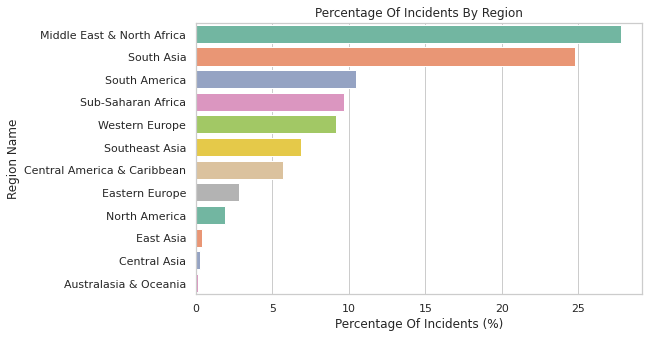

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(data=region,
              x='Percentage Of Incidents (%)',
              y='Region Name',
              orient='h',
              palette='Set2'
            )
plt.title('Percentage Of Incidents By Region')


plt.show()

In [ ]:
# calculate total percentage of top 2 regions
region['Percentage Of Incidents (%)'][:2].sum()

52.53314693628192

Top 2 regions account for more than 50% of the total incidents in the world

In [ ]:
country = df_new['country_txt'].value_counts()
country = country.reset_index()
country.rename(columns={'index': 'Country Name', 'country_txt': 'Number Of Incidents'}, inplace=True)
country.head()

,Country Name,Number Of Incidents
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [ ]:
print('Number of countries:', len(country))

Number of countries: 201


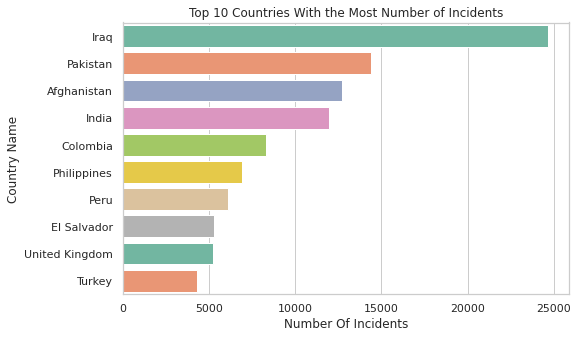

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=country[:10],
              x='Number Of Incidents',
              y='Country Name',
              orient='h',
              palette='Set2'
            )
plt.title('Top 10 Countries With the Most Number of Incidents')


plt.show()

In [ ]:
# additional: check terrorism in vietnam
vietnam = df_new[df_new['country_txt'] == 'Vietnam']
vietnam

,iyear,country_txt,latitude,longitude,region_txt,city,targtype1_txt,targsubtype1_txt,gname,attacktype1_txt,weaptype1_txt,nkill,imonth,iday
1342,1972,Vietnam,13.977956,108.002298,Southeast Asia,Pleiku,Airports & Aircraft,Aircraft (not at an airport),Unknown,Bombing/Explosion,Explosives,81.0,6,15
52821,1992,Vietnam,10.829260,106.633072,Southeast Asia,Ho Chi Minh City,Airports & Aircraft,Aircraft (not at an airport),Unknown,Hijacking,Melee,0.0,9,4
57514,1994,Vietnam,10.829260,106.633072,Southeast Asia,Ho Chi Minh City,Business,Bank/Commerce,Unknown,Bombing/Explosion,Explosives,0.0,10,13
60874,1995,Vietnam,11.941593,108.458004,Southeast Asia,Dalat,Food or Water Supply,Water Supply,Unknown,Bombing/Explosion,Explosives,0.0,11,2
62986,1996,Vietnam,21.033077,105.849981,Southeast Asia,Hanoi,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,Unknown,Unknown,0.0,7,28
65048,1997,Vietnam,NaN,NaN,Southeast Asia,Unknown,Maritime,Commercial Maritime,Unknown,Armed Assault,Firearms,0.0,3,28
65527,1997,Vietnam,10.829260,106.633072,Southeast Asia,Ho Chi Minh City,Business,NaN,Unknown,Assassination,Melee,1.0,6,4
71862,2001,Vietnam,12.666194,108.038248,Southeast Asia,Unknown,Educational Institution,School/University/Educational Building,Unknown,Unarmed Assault,Chemical,0.0,2,10
71886,2001,Vietnam,12.666194,108.038248,Southeast Asia,Unknown,Educational Institution,School/University/Educational Building,Unknown,Unarmed Assault,Chemical,0.0,2,14
71929,2001,Vietnam,12.666194,108.038248,Southeast Asia,Unknown,Educational Institution,School/University/Educational Building,Unknown,Unarmed Assault,Chemical,0.0,2,23


In [ ]:
print('Number of attacks in Vietnam from 1970-2017:', len(vietnam))

Number of attacks in Vietnam from 1970-2017: 13


In [ ]:
# get GeoDataFrame World Map from geopandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
# merge country to world to draw map density of incidents
# use left join to keep all countries in geopandas's geodataframe that it can draw
# then fill Number Of Incidents column nan values with 0 for countries without terrorism data
world_merged = world.merge(country, left_on='name', right_on='Country Name', how='left')
world_merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Number Of Incidents
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,17.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,59.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara,5.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,96.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,2836.0


In [ ]:
# check null
world_merged.isna().sum()

pop_est                 0
continent               0
name                    0
iso_a3                  0
gdp_md_est              0
geometry                0
Country Name           11
Number Of Incidents    11
dtype: int64

In [ ]:
# fill null values with 0
world_merged['Number Of Incidents'].fillna(0, inplace=True)
world_merged.isna().sum()

pop_est                 0
continent               0
name                    0
iso_a3                  0
gdp_md_est              0
geometry                0
Country Name           11
Number Of Incidents     0
dtype: int64

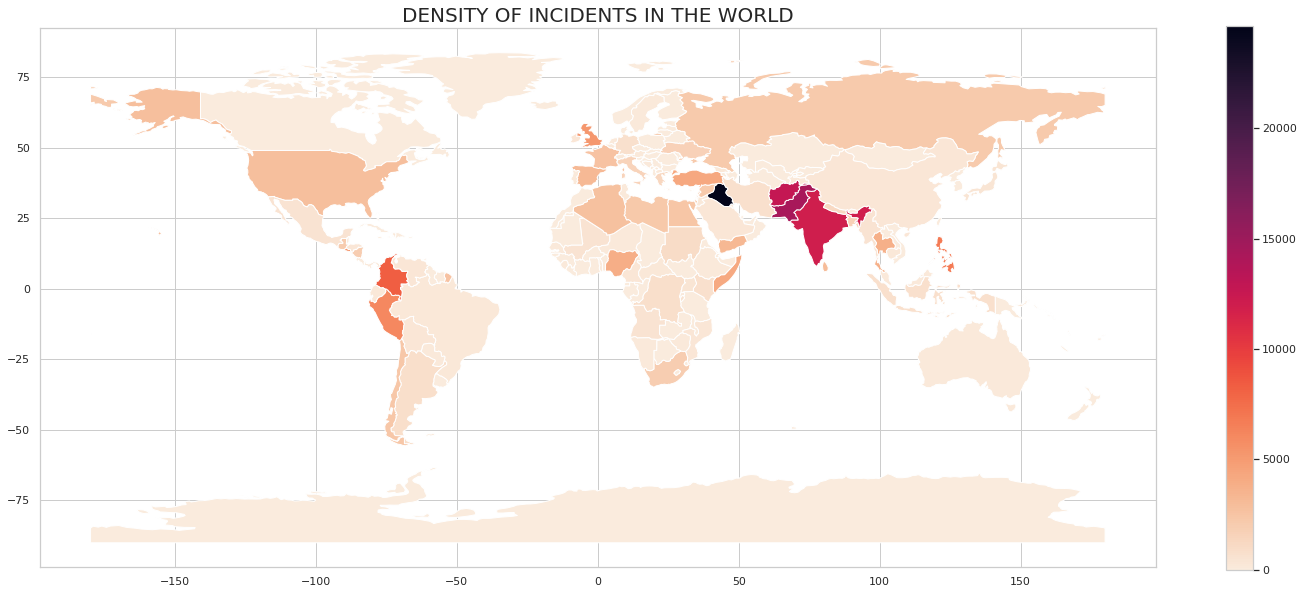

In [ ]:
# create map showing density of incidents in the world
world_merged.plot('Number Of Incidents', cmap='rocket_r', legend=True, figsize=(25, 10))
plt.title('DENSITY OF INCIDENTS IN THE WORLD', fontsize=20)
plt.show()

Looking at the density map, it is not surprising that the area in the middle of the map is the darkest, which means the most terrorist attacks, namely the Middle East and North Africa, and South Asia. When these are areas with many political and military fluctuations. In addition, the north of North America is also a complex and volatile area.

References:

https://towardsdatascience.com/interactive-geographical-maps-with-geopandas-4586a9d7cc10
https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb#scrollTo=A91qAwyjOTs8
https://python-visualization.github.io/folium/quickstart.html

In [ ]:
target_type = df_new['targtype1_txt'].value_counts(normalize=True) * 100
target_type = target_type.reset_index()
target_type.rename(columns={'index': 'Target Type', 'targtype1_txt': 'Percentage Of Incidents (%)'}, inplace=True)
target_type

,Target Type,Percentage Of Incidents (%)
0,Private Citizens & Property,23.947801
1,Military,15.401974
2,Police,13.487735
3,Government (General),11.713844
4,Business,11.375907
5,Transportation,3.742068
6,Utilities,3.314969
7,Unknown,3.246171
8,Religious Figures/Institutions,2.443709
9,Educational Institution,2.378764


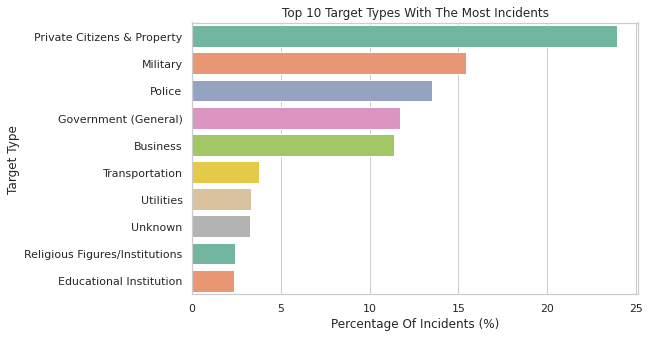

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=target_type[:10],
              x='Percentage Of Incidents (%)',
              y='Target Type',
              orient='h',
              palette='Set2')
plt.title('Top 10 Target Types With The Most Incidents')


plt.show()

Terrorist targets are mainly civilians and military.

In [ ]:
df_1 = df_new[['region_txt', 'nkill']].copy()
df_1['nkill'] = df_1['nkill'].fillna(df['nkill'].median())

In [ ]:
n_deaths = df_1.groupby('region_txt').sum().sort_values(by='nkill', ascending=False).reset_index()
n_deaths.rename(columns={'region_txt': 'Region Name', 'nkill': 'Number Of Fatalities'}, inplace=True)
n_deaths

,Region Name,Number Of Fatalities
0,Middle East & North Africa,137642.0
1,South Asia,101319.0
2,Sub-Saharan Africa,78386.0
3,South America,28849.0
4,Central America & Caribbean,28708.0
5,Southeast Asia,15637.0
6,Eastern Europe,7415.0
7,Western Europe,6694.0
8,North America,4916.0
9,East Asia,1152.0


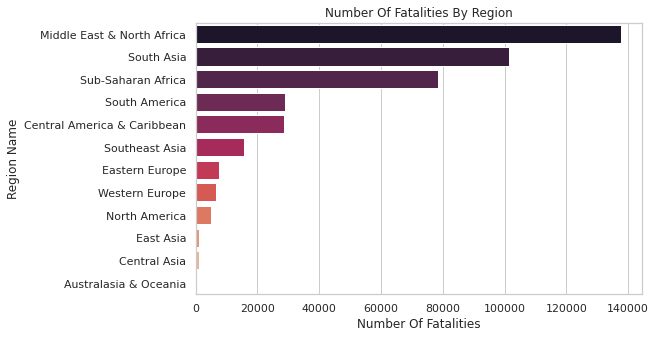

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=n_deaths,
              x='Number Of Fatalities',
              y='Region Name',
              orient='h',
              palette='rocket')
plt.title('Number Of Fatalities By Region')


plt.show()

In [ ]:
n_deaths_avg = df_1.groupby('region_txt').mean().sort_values(by='nkill', ascending=False).reset_index()
n_deaths_avg.rename(columns={'region_txt': 'Region Name', 'nkill': 'Average Fatalities'}, inplace=True)
n_deaths_avg

,Region Name,Average Fatalities
0,Sub-Saharan Africa,4.466439
1,Central America & Caribbean,2.775329
2,Middle East & North Africa,2.726988
3,South Asia,2.252835
4,Central Asia,1.776199
5,South America,1.520129
6,Eastern Europe,1.441485
7,East Asia,1.436409
8,North America,1.422454
9,Southeast Asia,1.252463


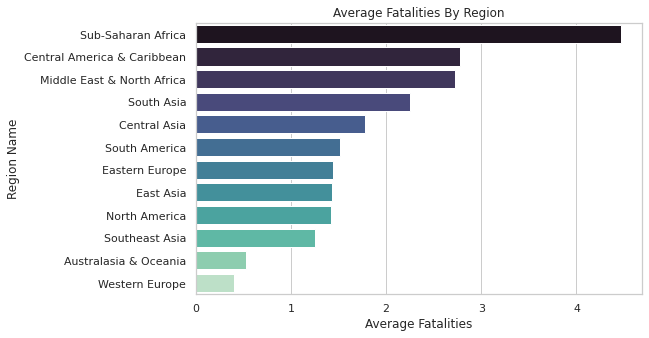

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=n_deaths_avg,
              x='Average Fatalities',
              y='Region Name',
              orient='h',
              palette='mako')
plt.title('Average Fatalities By Region')


plt.show()

In [ ]:
attack_type = df['attacktype1_txt'].value_counts(normalize=True) * 100
attack_type = attack_type.reset_index()
attack_type.rename(columns={'index': 'Attack Type', 'attacktype1_txt': 'Percentage Of Usage (%)'}, inplace=True)
attack_type

,Attack Type,Percentage Of Usage (%)
0,Bombing/Explosion,48.574228
1,Armed Assault,23.484377
2,Assassination,10.629035
3,Hostage Taking (Kidnapping),6.141196
4,Facility/Infrastructure Attack,5.699787
5,Unknown,4.004601
6,Unarmed Assault,0.558641
7,Hostage Taking (Barricade Incident),0.545432
8,Hijacking,0.362704


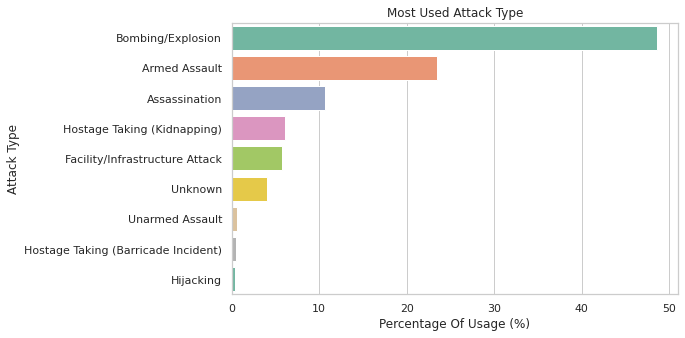

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=attack_type,
              x='Percentage Of Usage (%)',
              y='Attack Type',
              orient='h',
              palette='Set2')
plt.title('Most Used Attack Type')


plt.show()

#**Analysis 2: Target Type Trend Of Regions And How They Change From Region to Region?**

In [ ]:
df_2 = df_new[['region_txt', 'targtype1_txt']].copy()
df_2.head()

,region_txt,targtype1_txt
0,Central America & Caribbean,Private Citizens & Property
1,North America,Government (Diplomatic)
2,Southeast Asia,Journalists & Media
3,Western Europe,Government (Diplomatic)
4,East Asia,Government (Diplomatic)


In [ ]:
df_2['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [ ]:
# create an ordered list of regions from West to East
order_regions = ['North America', 'Central America & Caribbean', 'South America', 'Western Europe', 'Eastern Europe',
                 'Sub-Saharan Africa', 'Middle East & North Africa', 'Central Asia','South Asia', 'East Asia', 'Southeast Asia', 'Australasia & Oceania']

In [ ]:
region_grouped = df_2.groupby(['region_txt'])['targtype1_txt'].value_counts(normalize=True) * 100
region_group_new = region_grouped.groupby(level=[0]).nlargest(5).rename('Percentage Incidents (%)').reset_index(level=[0, 2])
region_group_new = region_group_new.loc[order_regions].reset_index(drop=True) # rearrange order of regions and drop index
region_group_new

,region_txt,targtype1_txt,Percentage Incidents (%)
0,North America,Business,26.186343
1,North America,Private Citizens & Property,13.541667
2,North America,Government (General),11.979167
3,North America,Abortion Related,7.465278
4,North America,Police,6.799769
5,Central America & Caribbean,Military,29.630704
6,Central America & Caribbean,Private Citizens & Property,14.510828
7,Central America & Caribbean,Utilities,11.861949
8,Central America & Caribbean,Business,11.513921
9,Central America & Caribbean,Government (General),10.740526


In [ ]:
region_group_new['Rank'] = region_group_new.groupby('region_txt')['Percentage Incidents (%)'].rank('min', ascending=False).astype(int)
region_group_new

,region_txt,targtype1_txt,Percentage Incidents (%),Rank
0,North America,Business,26.186343,1
1,North America,Private Citizens & Property,13.541667,2
2,North America,Government (General),11.979167,3
3,North America,Abortion Related,7.465278,4
4,North America,Police,6.799769,5
5,Central America & Caribbean,Military,29.630704,1
6,Central America & Caribbean,Private Citizens & Property,14.510828,2
7,Central America & Caribbean,Utilities,11.861949,3
8,Central America & Caribbean,Business,11.513921,4
9,Central America & Caribbean,Government (General),10.740526,5


**RANKING TABLE**

In [ ]:
# create ranking table target types of each regions
ranking_table = region_group_new.pivot_table(index='Rank',
                                             columns='region_txt',
                                             values='targtype1_txt',
                                             aggfunc=','.join)
ranking_table = ranking_table[order_regions].copy()
ranking_table

region_txt,North America,Central America & Caribbean,South America,Western Europe,Eastern Europe,Sub-Saharan Africa,Middle East & North Africa,Central Asia,South Asia,East Asia,Southeast Asia,Australasia & Oceania
Rank,,,,,,,,,,,,
1,Business,Military,Business,Business,Military,Private Citizens & Property,Private Citizens & Property,Government (General),Private Citizens & Property,Transportation,Private Citizens & Property,Government (General)
2,Private Citizens & Property,Private Citizens & Property,Private Citizens & Property,Private Citizens & Property,Police,Military,Military,Military,Police,Government (General),Military,Business
3,Government (General),Utilities,Government (General),Government (General),Private Citizens & Property,Government (General),Police,Private Citizens & Property,Military,Business,Government (General),Private Citizens & Property
4,Abortion Related,Business,Police,Police,Government (General),Police,Government (General),Police,Government (General),Police,Business,Police
5,Police,Government (General),Utilities,Military,Business,Business,Business,Business,Business,Private Citizens & Property,Police,Government (Diplomatic)


Looking at the table above, we can:
1. Easily read the names of the top 5 target types of each region.
2. Finding the similar and different target types of each pair of regions.




In [ ]:
print('Number of unique target types in the ranking table:', region_group_new['targtype1_txt'].nunique())

Number of unique target types in the ranking table: 9


- Lets take a look at the number of unique values, there are only 9 unique target types in all 12 regions.
- In general, there's not much shuffling of target types in 12 regions. Therefore top 5 target types of the regions are only within range of 9 unique target types. That means there are many common target types between them. So what's the difference?

Look at the chart below to have a more general and in-depth view accross all regions.


In [ ]:
# filter out some necessary target types
region_group_new_filtered = region_group_new[region_group_new['targtype1_txt'].isin(['Private Citizens & Property', 'Business', 'Military', 'Abortion Related', 'Transportation', 'Government (Diplomatic)'])].copy()

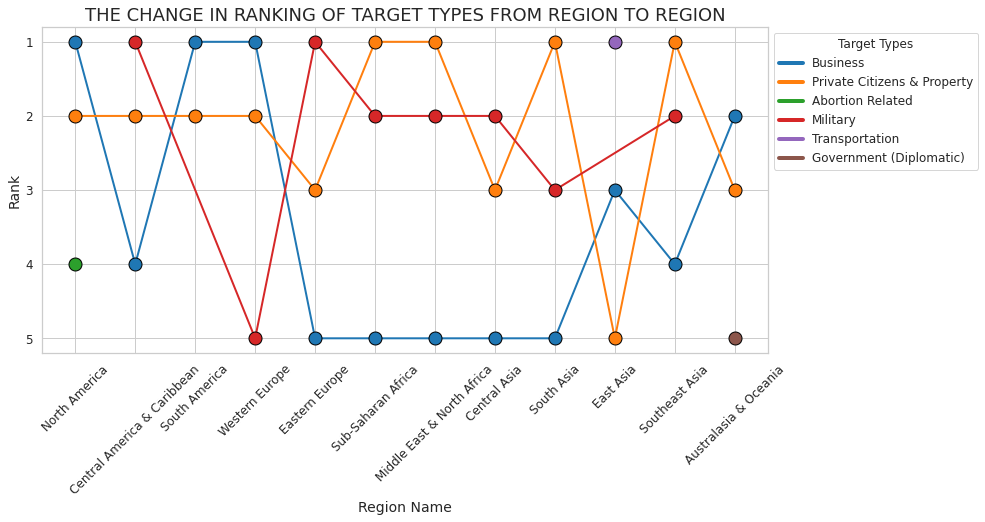

In [ ]:
# create a chart showing the change in rank of each target from region to region

plt.figure(figsize=(13, 6))
sns.lineplot(data=region_group_new_filtered,
              x='region_txt',
              y='Rank',
              hue='targtype1_txt',
              marker='o',
              markersize=13,
              markeredgecolor='black',
              markeredgewidth=1,
              palette='tab10',
              linewidth=2)

plt.gca().invert_yaxis()

plt.xticks(rotation=45, fontsize=12)
plt.yticks(ticks=range(1, 6), fontsize=12)

plt.xlabel('Region Name', fontsize=14)
plt.ylabel('Rank', fontsize=14)

leg = plt.legend(title='Target Types', fontsize=12, bbox_to_anchor=(1, 1))
for i in range(6):
  leg.get_lines()[i].set_linewidth(4)

plt.title('THE CHANGE IN RANKING OF TARGET TYPES FROM REGION TO REGION', fontsize=18)

plt.show()


This chart is called Bump Chart.

https://thinkinsights.net/digital/bump-chart/?fbclid=IwAR1EJjEEKzBjOHRSY6RV1ofWBS6yttZGsK88vamrbKqU_mx1InwyYW6r1Ls


- In the common target types, there is still the difference in rank of them. This represents the difference in priority of each region for target types. For example of some remarkable target types:
 - The blue line shows the priority for the 'Business' target type in regions with developed economies such as North America, South America, Western Europe, Australasia & Oceania.
 - The red line shows the priority for the 'Military' target type in regions that are inherently politically and militarily unstable such as Central America & Caribbean, Eastern Europe, Middle East & North Africa, etc.
 - We can also see a very clear contrast of these two lines, when one has a high rank, the other has a low rank and vice versa.
 - It's no suprise that the orange line represents for 'Private Citizens & Property' target type which is usually get high rank because it ranked 1st in overall
- In addition, there are individual markers and are not linked to any other markers of the same color, which means that these target types are completely outside the top 5 of the other regions. This makes the region have its own remarkable feature. For instance, bottom right brown marker represents for 'Government (Diplomatic)' target type in Australasia & Oceania region.
- However, there is a very **special** marker in these markers when it's not only outside the top 5 of other regions but also ranked 1st in one region, which is **purple** marker near the top right corner. Yes, this marker represents for **Transportation** target type in East Asia region. But why?


#**Analysis 3: Why Transportation Is A Top Terrorist Target Type In East Asia Region?**

In [ ]:
df_3 = df_new[df_new['region_txt'] == 'East Asia'][['iyear', 'country_txt', 'latitude', 'longitude', 'region_txt', 'city', 'targtype1_txt', 'targsubtype1_txt',
                                                    'attacktype1_txt', 'weaptype1_txt']].copy()
df_3.head()

,iyear,country_txt,latitude,longitude,region_txt,city,targtype1_txt,targsubtype1_txt,attacktype1_txt,weaptype1_txt
4,1970,Japan,33.580412,130.396361,East Asia,Fukouka,Government (Diplomatic),Embassy/Consulate,Facility/Infrastructure Attack,Incendiary
162,1970,Japan,33.580412,130.396361,East Asia,Fukouka,Airports & Aircraft,Aircraft (not at an airport),Hijacking,Explosives
1085,1971,Taiwan,23.583333,119.583330,East Asia,Unknown,Airports & Aircraft,Aircraft (not at an airport),Bombing/Explosion,Explosives
1851,1973,Japan,35.281341,139.672200,East Asia,Yokosuka,Military,Military Barracks/Base/Headquarters/Checkpost,Facility/Infrastructure Attack,Incendiary
2003,1973,Japan,35.689125,139.747742,East Asia,Tokyo,Government (Diplomatic),Embassy/Consulate,Facility/Infrastructure Attack,Incendiary


In [ ]:
df_3.shape

(802, 10)

In [ ]:
trans = df_3[df_3['targtype1_txt'] == 'Transportation'].copy()
trans.head()

,iyear,country_txt,latitude,longitude,region_txt,city,targtype1_txt,targsubtype1_txt,attacktype1_txt,weaptype1_txt
6600,1978,Japan,35.689125,139.747742,East Asia,Tokyo,Transportation,Bus (excluding tourists),Facility/Infrastructure Attack,Incendiary
7868,1979,Japan,34.693738,135.502165,East Asia,Osaka,Transportation,Bridge/Car Tunnel,Facility/Infrastructure Attack,Incendiary
10171,1980,China,22.281867,114.161326,East Asia,Hong Kong,Transportation,Bus (excluding tourists),Bombing/Explosion,Explosives
13108,1981,Japan,35.689125,139.747742,East Asia,Tokyo,Transportation,Train/Train Tracks/Trolley,Facility/Infrastructure Attack,Incendiary
26756,1985,Japan,35.689125,139.747742,East Asia,Tokyo,Transportation,Train/Train Tracks/Trolley,Facility/Infrastructure Attack,Incendiary


In [ ]:
trans.shape

(148, 10)

In [ ]:
print('Countries in East Asia Region:', df_3['country_txt'].unique())
# there is also a Mongolia but we don't have data on this country

Countries in East Asia Region: ['Japan' 'Taiwan' 'South Korea' 'China' 'North Korea']


In [ ]:
print('Number of incidents in East Asia Region:', len(df_3))

Number of incidents in East Asia Region: 802


Looking back the charts in overall section, East Asia Region ranked 3rd from bottom and Transportation target type still ranks quite high, when it's ranked 6th in overall

In [ ]:
print('Number of incidents on Transportation target type in East Asia:', len(trans))

Number of incidents on Transportation target type in East Asia: 148


In [ ]:
east_asia_target_type = df_3['targtype1_txt'].value_counts()
east_asia_target_type = east_asia_target_type.reset_index()
east_asia_target_type.rename(columns={'index': 'Target Type', 'targtype1_txt': 'Number Of Incidents'}, inplace=True)
east_asia_target_type.head()

,Target Type,Number Of Incidents
0,Transportation,148
1,Government (General),128
2,Business,102
3,Police,98
4,Private Citizens & Property,97


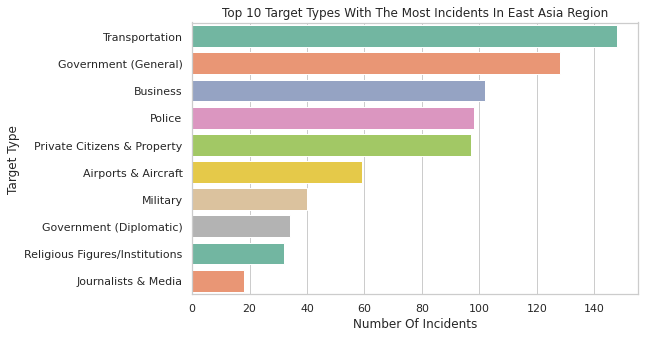

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=east_asia_target_type[:10],
              x='Number Of Incidents',
              y='Target Type',
              orient='h',
              palette='Set2')
plt.title('Top 10 Target Types With The Most Incidents In East Asia Region')


plt.show()

In [ ]:
east_asia_country = trans['country_txt'].value_counts()
east_asia_country = east_asia_country.reset_index()
east_asia_country.rename(columns={'index': 'Country Name', 'country_txt': 'Number Of Incidents'}, inplace=True)
east_asia_country.head()

,Country Name,Number Of Incidents
0,China,83
1,Japan,52
2,Taiwan,13


Lets plot the location of terrorist attacks on Transportation in East Asia region

In [ ]:
trans_map = trans[['iyear', 'country_txt', 'city', 'latitude', 'longitude', 'targsubtype1_txt']].copy()

In [ ]:
# check null
trans_map.isna().sum()

iyear               0
country_txt         0
city                0
latitude            3
longitude           3
targsubtype1_txt    0
dtype: int64

In [ ]:
# drop null
trans_map.dropna(inplace=True)
trans_map.isna().sum()

iyear               0
country_txt         0
city                0
latitude            0
longitude           0
targsubtype1_txt    0
dtype: int64

In [ ]:
east_asia_map = world[world['name'].isin(['Japan', 'Mongolia', 'Taiwan', 'South Korea', 'China', 'North Korea'])]
east_asia_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ..."
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."
97,3068243,Asia,Mongolia,MNG,37000.0,"POLYGON ((87.75126 49.29720, 88.80557 49.47052..."
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
140,23508428,Asia,Taiwan,TWN,1127000.0,"POLYGON ((121.77782 24.39427, 121.17563 22.790..."


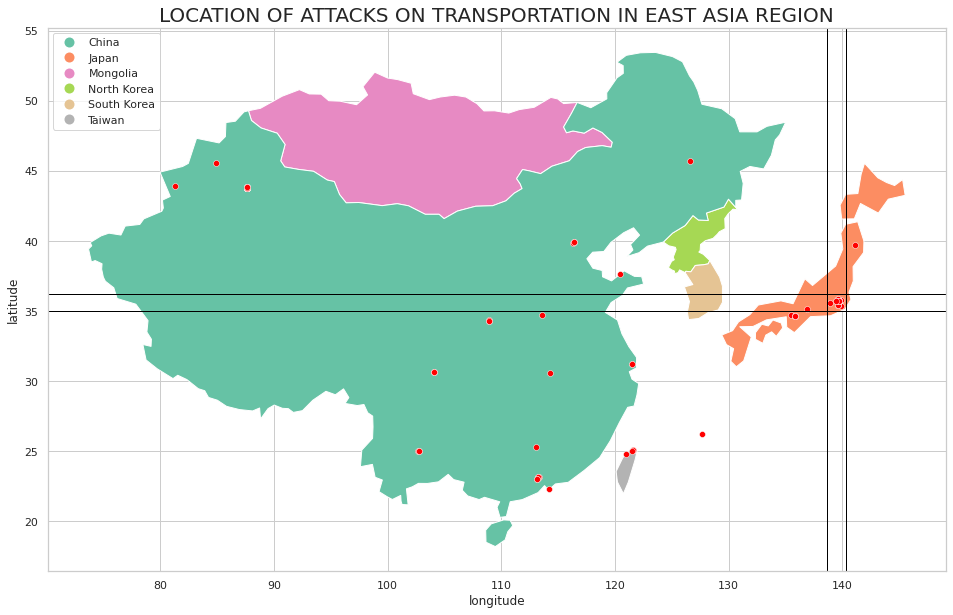

In [ ]:
# plot the map of east asia region
east_asia_map.plot(column='name', legend=True, cmap='Set2', figsize=(25, 10))
sns.scatterplot(data=trans,
                x='longitude',
                y='latitude',
                color='red')
plt.axhline(35, linewidth=1, c='black')
plt.axhline(36.2, linewidth=1, c='black')
plt.axvline(138.7, linewidth=1, c='black')
plt.axvline(140.3, linewidth=1, c='black')
plt.title('LOCATION OF ATTACKS ON TRANSPORTATION IN EAST ASIA REGION', fontsize=20)
plt.show()

In [ ]:
trans_map['city'] = trans_map['city'].str.replace('tokyo', 'Tokyo')

In [ ]:
japan = trans_map[trans_map['country_txt'] == 'Japan']['city'].value_counts()
japan = japan.reset_index()
japan.rename(columns={'index': 'City Name', 'city': 'Number Of Incidents'}, inplace=True)
japan.head()

,City Name,Number Of Incidents
0,Tokyo,29
1,Unknown,9
2,Yokohama,4
3,Matsudo,1
4,Kimitsu,1


In [ ]:
# get all location of points inside the square
df_japan = trans_map[trans_map['longitude'].between(138.7, 140.3) & trans_map['latitude'].between(35, 36.2)].copy()
df_japan['iyear'] = df_japan['iyear'].astype(str)
# create a label column to make popup later
df_japan['label'] = df_japan['iyear'] + ' - ' + df_japan['targsubtype1_txt']
df_japan.head()

,iyear,country_txt,city,latitude,longitude,targsubtype1_txt,label
6600,1978,Japan,Tokyo,35.689125,139.747742,Bus (excluding tourists),1978 - Bus (excluding tourists)
13108,1981,Japan,Tokyo,35.689125,139.747742,Train/Train Tracks/Trolley,1981 - Train/Train Tracks/Trolley
26756,1985,Japan,Tokyo,35.689125,139.747742,Train/Train Tracks/Trolley,1985 - Train/Train Tracks/Trolley
29210,1986,Japan,Tokyo,35.689125,139.747742,Train/Train Tracks/Trolley,1986 - Train/Train Tracks/Trolley
33637,1988,Japan,Tokyo,35.689125,139.747742,Taxi/Rickshaw,1988 - Taxi/Rickshaw


In [ ]:
center_point = [(35 + 36.2) / 2, (138.7 + 140.3) / 2]
center_point

[35.6, 139.5]

In [ ]:
japan_map = folium.Map(location=center_point, zoom_start=10)
for lat, lng, label in zip(df_japan.latitude, df_japan.longitude, df_japan.label):
  folium.Marker(
      location=[lat, lng],
      popup=folium.Popup(f"<b>{label}</b>", show=True),
      icon=folium.Icon(color='red'),
  ).add_to(japan_map)
japan_map

In [ ]:
japan_map.save('japan_map_terrorism.html') # save as .html file

Generally, most attacks on the transportation system in Japan are on the train, subway system and in the city center with a large number of residents and dense traffic system. How about the whole East Asia?

In [ ]:
targsubtype1 = trans['targsubtype1_txt'].value_counts()
targsubtype1 = targsubtype1.reset_index()
targsubtype1.rename(columns={'index': 'Target Sub-Type', 'targsubtype1_txt': 'Number Of Incidents'}, inplace=True)
targsubtype1

,Target Sub-Type,Number Of Incidents
0,Train/Train Tracks/Trolley,101
1,Bus (excluding tourists),25
2,Highway/Road/Toll/Traffic Signal,12
3,Subway,8
4,Taxi/Rickshaw,1
5,Bridge/Car Tunnel,1


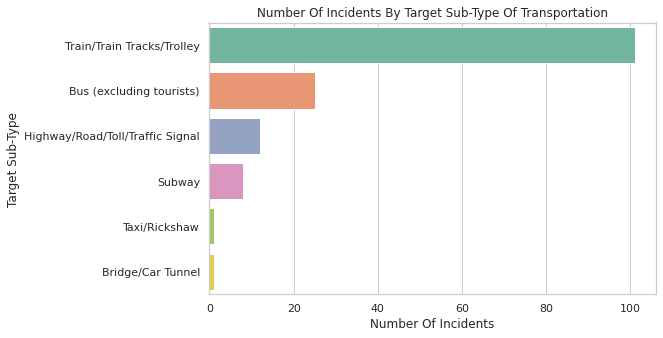

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=targsubtype1,
              x='Number Of Incidents',
              y='Target Sub-Type',
              orient='h',
              palette='Set2')
plt.title('Number Of Incidents By Target Sub-Type Of Transportation')


plt.show()

Train target type is still ranked 1st and leave the rest. It's quite understandable, because, as we all know that almost developed countries in East Asia like China or Japan have a very large subway system. This partly explains the reason why transportation is the number 1 target type.

In terms of geographical location of attacks, they will usually take place in big cities with dense traffic systems and crowded places like subways. In order to cause great damage to people and property, as well as partly possible to prevent trade and indirectly destroy the economy.


To answer the question more completely, continue to analyse the timeline of the terrorist attacks in China and Japan.

In [ ]:
df_timeline = trans[(trans['country_txt'] == 'China') | (trans['country_txt'] == 'Japan')][['iyear', 'country_txt']]
df_timeline.head()

,iyear,country_txt
6600,1978,Japan
7868,1979,Japan
10171,1980,China
13108,1981,Japan
26756,1985,Japan


In [ ]:
timeline = df_timeline.groupby(['country_txt', 'iyear'])['country_txt'].count()
timeline.rename('Number of Incidents', inplace=True)
timeline = timeline.reset_index()
timeline.head()

,country_txt,iyear,Number of Incidents
0,China,1980,1
1,China,1989,1
2,China,1990,1
3,China,1992,2
4,China,1994,5


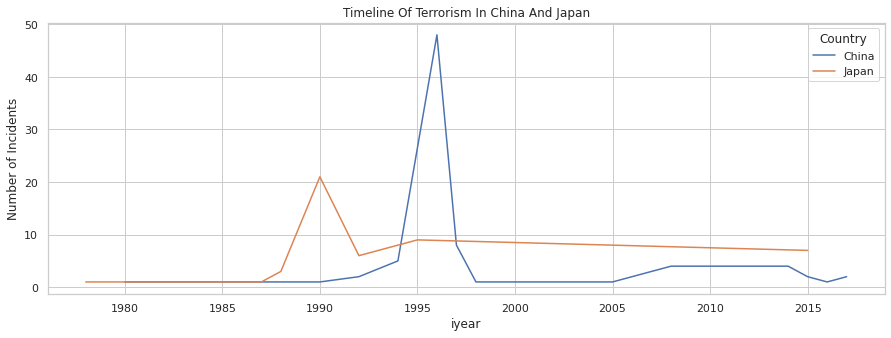

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=timeline,
              x='iyear',
              y='Number of Incidents',
              hue='country_txt')

plt.title('Timeline Of Terrorism In China And Japan')
plt.legend(title='Country')

plt.show()

Tokyo subway attack of 1995, coordinated multiple-point terrorist attack in Tokyo on March 20, 1995, in which the odourless, colourless, and highly toxic nerve gas sarin developed by the Nazis was released in the city’s subway system. It was the worst domestic terror attack ever carried out on Japanese soil, the attack resulted in the deaths of 12 (later increased to 13) people, and some 5,500 others were injured to varying degrees. The culprits were AUM Shinrikyo, an obscure religious group who believed the end of the world was coming. Members of the Japan-based new religious movement AUM Shinrikyo (since 2000 called Aleph) were soon identified as the perpetrators of the attack.

![](https://cdn.britannica.com/91/162991-050-6DBE177B/terrorist-attack-wake-AUM-Shinrikyo-sarin-nerve-March-20-1995.jpg)



https://www.bbc.com/news/world-asia-35975069

https://www.britannica.com/event/Tokyo-subway-attack-of-1995

https://en.wikipedia.org/wiki/Tokyo_subway_sarin_attack

The main cause of the transportation terrorist attacks in China around since 1990 was relevant to the course of Uyghur-related violence in Xinjiang and Central Asia. The locations and types of violent incidents were influenced by a combination of Chinese government policies and the political geography of Xinjiang.

https://www.jstor.org/stable/41447781

https://en.wikipedia.org/wiki/Uyghur_genocide

https://en.wikipedia.org/wiki/Terrorism_in_China

#**Conclusion**

The main reason why the Transportation has become the most targeted type of terrorist is because almost developed countries in East Asia like China or Japan have a very large subway system. Therefore, they will often take place in big cities with dense traffic systems and crowded places like subways. In order to cause great damage to people and property, as well as prevent trade.
As well as some people's misguided beliefs, and being influenced by attacks related to government and border policies.

Further: Keep doing more analysis for this topic, and continue to discover other interesting things in this potential dataset.

#**Export to Google Sheet Report and Design a GDS Dashboard**

In [ ]:
# Connect to Google Sheets
# !pip install --upgrade oauth2client gspread

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

Create new spreadsheet, this step is only ran in the first time exporting data to gsheet.  

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
sh = gc.create('terrorism_project')

In [ ]:
ranking_table_new = ranking_table.reset_index()

After this step, go to https://docs.google.com/spreadsheets to find your sheet and get the link of it.

In [ ]:
# https://docs.google.com/spreadsheets/d/12cS-MnUxV9lfKOrhqQlR1g3RRcpDF9XlOhm4xHIa-ic/edit#gid=0
# key : 12cS-MnUxV9lfKOrhqQlR1g3RRcpDF9XlOhm4xHIa-ic

In [ ]:
# ❗️ Note that before export data, you have to create the empty sheets in the Google Sheet first
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_name: name of sheet in spreadsheet
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)
    set_with_dataframe(worksheet, data)

In [ ]:
# Notice! Replace the key by your google sheet key
# Notice! Worksheet has to have unique name

export_data_to_new_sheet('1gkZ7YhZ4bTX5d3ovdwT7S7nvJk8Ho_DQA8janO58_oc', 'region', region)
export_data_to_new_sheet('1gkZ7YhZ4bTX5d3ovdwT7S7nvJk8Ho_DQA8janO58_oc', 'target_type', target_type)
export_data_to_new_sheet('1gkZ7YhZ4bTX5d3ovdwT7S7nvJk8Ho_DQA8janO58_oc', 'ranking_table_new', ranking_table_new)
export_data_to_new_sheet('1gkZ7YhZ4bTX5d3ovdwT7S7nvJk8Ho_DQA8janO58_oc', 'east_asia_target_type', east_asia_target_type)
export_data_to_new_sheet('1gkZ7YhZ4bTX5d3ovdwT7S7nvJk8Ho_DQA8janO58_oc', 'east_asia_country', east_asia_country)
export_data_to_new_sheet('1gkZ7YhZ4bTX5d3ovdwT7S7nvJk8Ho_DQA8janO58_oc', 'targsubtype1', targsubtype1)
export_data_to_new_sheet('1gkZ7YhZ4bTX5d3ovdwT7S7nvJk8Ho_DQA8janO58_oc', 'timeline', timeline)

In [ ]:
# Ví dụ: Load bảng cũ:

sh = gc.open_by_key('12cS-MnUxV9lfKOrhqQlR1g3RRcpDF9XlOhm4xHIa-ic')
worksheet = sh.get_worksheet(0)
worksheet

<Worksheet 'revenue' id:418511350>

✍🏼 Example of Google Sheet Report at: https://docs.google.com/spreadsheets/d/13WLsffs8yHOmEIQNMe22QgygfwKRtMNTE9KqVm-F3lg/edit?usp=sharing

✍🏼 Example of Dashboard at: https://datastudio.google.com/reporting/3973cbb0-65cb-4864-92bc-93778a55ad27